In [168]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [169]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delimiter=r'\s+', names=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [170]:
# Scaling the input matrix
ms = MinMaxScaler()
X = ms.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns).drop('MEDV', axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [171]:
# Target vector
y = df.iloc[:, -1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [172]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.06, random_state = np.random.randint(200))

In [173]:
model = Sequential()

# 13>7>4>1 ANN model, for fun :D
model.add(Dense(units=13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')
 
model.fit(X_train, y_train, batch_size = 40, epochs = 150, verbose=1)

Epoch 1/150
12/12 [==============================] - 1s 2ms/step - loss: 592.2600
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 591.0706
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 589.0857
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 585.3798
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 578.1578
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 564.6653
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 540.6943
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 501.9808
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 444.8958
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 368.4394
Epoch 11/150
12/12 [==============================] - 0s 2ms/step - loss: 280.6243
Epoch 12/150
12/12 [==============================] - 0s 2ms/step - loss: 202.9725
Epoch 13/150


In [174]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 13)                182       
                                                                 
 dense_75 (Dense)            (None, 13)                182       
                                                                 
 dense_76 (Dense)            (None, 13)                182       
                                                                 
 dense_77 (Dense)            (None, 1)                 14        
                                                                 
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________


In [175]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 72ms/step


In [176]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

Mean Squared Error: 17.6875
Mean Absolute Error: 2.9216
R2 Score: 0.7280


In [177]:
y_test = np.array(y_test)
y_test

array([21.2, 20.6, 21.5, 21.7, 13.4, 20.4, 20. ,  5. , 14.5, 24. , 36.2,
       23.1, 23. , 21. , 19.5, 24.7, 32.2, 14.6, 14.3, 17.5, 37.6, 50. ,
       22.6, 30.3, 23.3, 22.1, 18.2, 23.1, 21. , 21.9, 27.5])

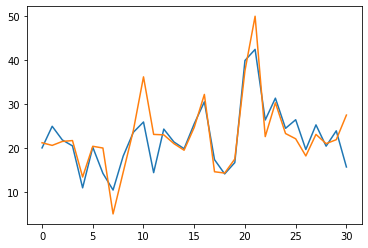

In [178]:
# output plot curve to get a rough idea of correlation
import matplotlib.pyplot as plt

plt.plot(y_pred)
plt.plot(y_test)
plt.show()